In [1]:
#importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
# Importar SVM y herramientas de optimización
from sklearn.svm import SVC  # Support Vector Classifier (para clasificación)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report

In [4]:
# Cargar el conjunto de datos
df = pd.read_csv('dataset/Tree_Data.csv')

In [5]:
# Exploración de caracteristicas del dataset
print("Vista inicial del DataFrame:")
display(df.head())
print("\nColumnas disponibles:")
print(df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes)

Vista inicial del DataFrame:


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN



Columnas disponibles:
['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core', 'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'PlantDate', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time', 'Event', 'Harvest', 'Alive']

Tipos de datos:
No               int64
Plot             int64
Subplot         object
Species         object
Light_ISF      float64
Light_Cat       object
Core             int64
Soil            object
Adult           object
Sterile         object
Conspecific     object
Myco            object
SoilMyco        object
PlantDate       object
AMF            float64
EMF            float64
Phenolics      float64
Lignin         float64
NSC            float64
Census           int64
Time           float64
Event          float64
Harvest         object
Alive           object
dtype: object



Resumen de valores nulos por columna:
No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64


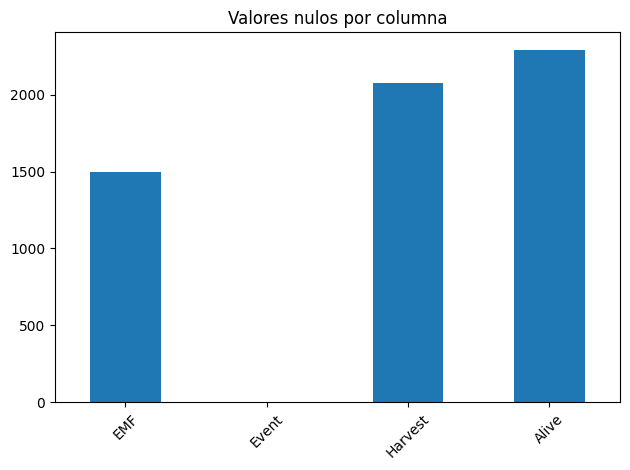

In [7]:
# ============================================================
# 1 ANÁLISIS Y TRATAMIENTO DE VALORES NULOS
#    Criterio: conservar registros útiles para segmentación
# ============================================================

print("\nResumen de valores nulos por columna:")
nulos = df.isna().sum()
print(nulos)

# Visualización rápida de columnas con nulos
plt.figure()
nulos_filtrados = nulos[nulos > 0]
if len(nulos_filtrados) > 0:
    nulos_filtrados.plot(kind='bar')
    plt.title('Valores nulos por columna')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron valores nulos en el DataFrame.")


In [8]:
# Reemplazar 'NA' por 'desconocido' en las columnas con valores nulos identificados
columnas_a_reemplazar = ['EMF', 'Event', 'Harvest', 'Alive']

for col in columnas_a_reemplazar:
    if col in df.columns:
        df[col] = df[col].replace('NA', 'desconocido')

# Verificar que los reemplazos se hicieron correctamente
print("\nValores únicos después del reemplazo en las columnas afectadas:")
for col in columnas_a_reemplazar:
    if col in df.columns:
        print(f"{col}: {df[col].unique()[:10]}")  # Mostrar primeros 10 únicos para verificar

# Verificar nuevamente los valores nulos
print("\nResumen de valores nulos después del reemplazo:")
print(df.isna().sum())


Valores únicos después del reemplazo en las columnas afectadas:
EMF: [  nan 31.07 28.19 20.    0.   36.18 21.58 32.75 21.84  9.09]
Event: [ 1.  0. nan]
Harvest: [nan 'X']
Alive: [nan 'X']

Resumen de valores nulos después del reemplazo:
No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64


In [10]:
# ============================================================
# 7. REVISIÓN FINAL DEL DATASET LIMPIO
# ============================================================

print("\nShape final del DataFrame (filas, columnas):", df.shape)
print("\nVista final de las primeras filas:")
display(df.head())

print("\nTipos de datos finales:")
print(df.dtypes)

print("\nResumen de valores nulos después de limpieza:")
print(df.isna().sum())


df.to_excel("datos_Tree.xlsx", index=False)
print("\nArchivo 'datos_Tree.xlsx' guardado correctamente.")


Shape final del DataFrame (filas, columnas): (2783, 24)

Vista final de las primeras filas:


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN



Tipos de datos finales:
No               int64
Plot             int64
Subplot         object
Species         object
Light_ISF      float64
Light_Cat       object
Core             int64
Soil            object
Adult           object
Sterile         object
Conspecific     object
Myco            object
SoilMyco        object
PlantDate       object
AMF            float64
EMF            float64
Phenolics      float64
Lignin         float64
NSC            float64
Census           int64
Time           float64
Event          float64
Harvest         object
Alive           object
dtype: object

Resumen de valores nulos después de limpieza:
No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NS

In [13]:
# Cargar el conjunto de datos
df_limpio = pd.read_excel('dataset/datos_Tree.xlsx', header=0)
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [14]:
# Rellenar vacíos y NaN con DESCONOCIDO en columnas clave
cols_rellenar = [
    'EMF',
    'Event',
    'Harvest',
    'Alive'
]

for col in cols_rellenar:
    if col in df.columns:
        df[col] = df[col].replace('', np.nan)        # vacíos explícitos a NaN
        df[col] = df[col].fillna('DESCONOCIDO')      # NaN -> DESCONOCIDO


In [15]:
# ============================================================
# 7. REVISIÓN FINAL DEL DATASET LIMPIO
# ============================================================

print("\nShape final del DataFrame (filas, columnas):", df.shape)
print("\nVista final de las primeras filas:")
display(df.head())

print("\nTipos de datos finales:")
print(df.dtypes)

print("\nResumen de valores nulos después de limpieza:")
print(df.isna().sum())


df.to_excel("datos_Tree_limpios.xlsx", index=False)
print("\nArchivo 'datos_Tree_limpios.xlsx' guardado correctamente.")


Shape final del DataFrame (filas, columnas): (2783, 24)

Vista final de las primeras filas:


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,DESCONOCIDO,-0.56,13.86,12.15,4,14.0,1.0,DESCONOCIDO,DESCONOCIDO
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,DESCONOCIDO,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,DESCONOCIDO,DESCONOCIDO
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,DESCONOCIDO,-0.71,14.29,12.36,4,14.0,1.0,DESCONOCIDO,DESCONOCIDO
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,DESCONOCIDO,-0.58,10.85,11.20,4,14.0,1.0,DESCONOCIDO,DESCONOCIDO



Tipos de datos finales:
No               int64
Plot             int64
Subplot         object
Species         object
Light_ISF      float64
Light_Cat       object
Core             int64
Soil            object
Adult           object
Sterile         object
Conspecific     object
Myco            object
SoilMyco        object
PlantDate       object
AMF            float64
EMF             object
Phenolics      float64
Lignin         float64
NSC            float64
Census           int64
Time           float64
Event           object
Harvest         object
Alive           object
dtype: object

Resumen de valores nulos después de limpieza:
No             0
Plot           0
Subplot        0
Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
PlantDate      0
AMF            0
EMF            0
Phenolics      0
Lignin         0
NSC            0
Census         0
Time           0
Event

In [2]:
df_limpio_Tree = pd.read_excel('datos_Tree_limpios.xlsx', header=0)

In [3]:
#Datos X: altitud y altura de sepal y petal:sepal_length, sepal_width, petal_length, petal_width
#Variable objetivo: 
y = df_limpio_Tree['Species']  # Cambia a 'Soil' o 'Alive' 
# Variables numéricas útiles: 'Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time'
# Variables categóricas: 'Light_Cat', 'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'EMF', 'Event', 'Harvest', 'Alive'
features_numericas = ['Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time']
features_categoricas = ['Light_Cat', 'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'EMF', 'Event', 'Harvest', 'Alive']
X = df_limpio_Tree[features_numericas + features_categoricas]
X = pd.get_dummies(X, columns=features_categoricas, drop_first=True)
print("Shape de X:", X.shape)
print("Columnas de X:", X.columns.tolist()[:20])  # Primeras 20 para verificar
print("Valores únicos en y:", y.unique()[:10])  # Primeros 10 para verificar

Shape de X: (2783, 742)
Columnas de X: ['Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time', 'Light_Cat_Low', 'Light_Cat_Med', 'Soil_Acer saccharum', 'Soil_Populus grandidentata', 'Soil_Prunus serotina', 'Soil_Quercus alba', 'Soil_Quercus rubra', 'Soil_Sterile', 'Adult_118', 'Adult_1201', 'Adult_1205', 'Adult_1297', 'Adult_1320']
Valores únicos en y: ['Acer saccharum' 'Quercus alba' 'Quercus rubra' 'Prunus serotina']


In [4]:
#Separación de conjunto de pruebas y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (2226, 742) Test shape: (557, 742)


In [ ]:
#Configuracion del SVM
svm_model = SVC(
    kernel='linear',   
    C=0.1,              
    random_state=42     
)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 2. Optimización de hiperparámetros
param_grid = {
    'kernel': ['linear', 'rbf'],  
    'C': [0.01, 0.1, 1],        
    'gamma': ['scale', 0.001, 0.01]  
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)  # cv=3 para velocidad
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)
print("Mejor score CV:", grid_search.best_score_)

# Usar el mejor modelo
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("\nAccuracy con mejores parámetros:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (mejor modelo):")
print(classification_report(y_test, y_pred_best))


Accuracy: 0.992818671454219

Classification Report:
                 precision    recall  f1-score   support

 Acer saccharum       0.99      1.00      1.00       150
Prunus serotina       1.00      1.00      1.00       150
   Quercus alba       0.99      0.99      0.99       135
  Quercus rubra       0.99      0.98      0.98       122

       accuracy                           0.99       557
      macro avg       0.99      0.99      0.99       557
   weighted avg       0.99      0.99      0.99       557

Fitting 3 folds for each of 18 candidates, totalling 54 fits
